In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
from scipy import stats
import pandas as pd
import numpy as np
import math

import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd

# 키 성장 예측

In [10]:
# 성장도표
height_table = pd.read_csv('/content/drive/MyDrive/project/3차project/height_table_final.csv', index_col=0)
height_table

,gender,age_year,age_month,L,M,S
1,1,0,0,1.0000,49.8842,0.0380
2,1,0,1,1.0000,54.7244,0.0356
3,1,0,2,1.0000,58.4249,0.0342
4,1,0,3,1.0000,61.4292,0.0333
5,1,0,4,1.0000,63.8860,0.0326
...,...,...,...,...,...,...
452,2,18,223,-0.4881,160.8981,0.0308
453,2,18,224,-0.4959,160.9372,0.0308
454,2,18,225,-0.5037,160.9762,0.0307
455,2,18,226,-0.5116,161.0153,0.0307


In [26]:
# g = 성별, x = 예측 골연령, y = 현재 신장
def height_prediction(gender, bone_age, current_height):
  # 남자
  if gender == 1:
    # 나이 개월수로 변환
    b_month, b_year = math.modf(bone_age)
    age = b_year * 12 + b_month * 12

    # 예측 대상의 LMS 구하기
    MH_table = height_table.query(f"gender == 1 & age_month	== {int(age)}")
    L = [x for x in MH_table['L']][0]
    M = [x for x in MH_table['M']][0]
    S = [x for x in MH_table['S']][0]

    # 신장 예측 공식에 사용되는 18세의 LMS 구하기
    table_18 = height_table.query("gender ==1 & age_month == 227")
    L_18 = [x for x in table_18['L']][0]
    M_18 = [x for x in table_18['M']][0]
    S_18 = [x for x in table_18['S']][0]

    
    if L != 0:
      z_score = ((current_height/M)**L - 1) / (L*S)
      prediction = M_18 * (1+ L_18 * S_18 * z_score)**(1/L_18)
      return prediction

    else:
        z_score = int(np.log(current_height/M)) / S
        prediction = M_18 * np.exp(S_18 *z_score)
        return prediction


  # 여자
  if gender == 2:
    b_month, b_year = math.modf(bone_age)
    age = b_year * 12 + b_month * 12
    MH_table = height_table.query(f"gender == 2 & age_month	== {int(age)}")
    L = [x for x in MH_table['L']][0]
    M = [x for x in MH_table['M']][0]
    S = [x for x in MH_table['S']][0]

    # 신장 예측 공식에 사용되는 18세의 LMS 구하기
    table_18 = height_table.query("gender ==2 & age_month == 227")
    L_18 = [x for x in table_18['L']][0]
    M_18 = [x for x in table_18['M']][0]
    S_18 = [x for x in table_18['S']][0]
    
    if L != 0:
      z_score = ((current_height/M)**L - 1) / (L*S)
      prediction = M_18 * (1+ L_18 * S_18 * z_score)**(1/L_18)
      return prediction

    else:
        z_score = int(np.log(current_height/M)) / S
        prediction = M_18 * np.exp(S_18 *z_score)
        return prediction

In [23]:
final_df = pd.read_csv('/content/drive/MyDrive/project/3차project/prediction_df.csv').iloc[:, 1:]
final_df

,신장,골연령,gender_num
0,88.9,3.249694,2
1,95.9,2.984606,2
2,88.2,2.590445,2
3,88.7,2.467192,2
4,90.8,4.184352,2
...,...,...,...
1223,168.6,16.328905,1
1224,164.8,16.176842,1
1225,172.1,15.616326,1
1226,162.9,16.507318,1


In [27]:
predictions = []

for i in range(len(final_df)):
  gender = final_df.loc[i, 'gender_num']
  bone_age = final_df.loc[i, '골연령']
  current_height = final_df.loc[i, '신장']

  predictions.append(height_prediction(gender, bone_age, current_height))
  

final_df['prediction'] = predictions
final_df

,신장,골연령,gender_num,prediction
0,88.9,3.249694,2,151.806707
1,95.9,2.984606,2,163.105294
2,88.2,2.590445,2,156.662743
3,88.7,2.467192,2,159.363783
4,90.8,4.184352,2,146.593694
...,...,...,...,...
1223,168.6,16.328905,1,171.389926
1224,164.8,16.176842,1,167.978864
1225,172.1,15.616326,1,175.880746
1226,162.9,16.507318,1,165.649207


In [28]:
final_df.to_csv('prediction.csv')

# 시각화

In [31]:
final_df[final_df['gender_num'] == 1].value_counts

<bound method DataFrame.value_counts of          신장        골연령  gender_num  prediction
568    89.2   2.426300           1  171.201230
569    90.8   4.542970           1  154.348800
570    91.1   1.768453           1  186.494507
571    93.9   3.152951           1  169.908784
572    93.6   4.579678           1  157.933082
...     ...        ...         ...         ...
1223  168.6  16.328905           1  171.389926
1224  164.8  16.176842           1  167.978864
1225  172.1  15.616326           1  175.880746
1226  162.9  16.507318           1  165.649207
1227  169.2  15.965986           1  172.464790

[660 rows x 4 columns]>

In [30]:
final_df[final_df['gender_num'] == 2].value_counts

<bound method DataFrame.value_counts of         신장        골연령  gender_num  prediction
0     88.9   3.249694           2  151.806707
1     95.9   2.984606           2  163.105294
2     88.2   2.590445           2  156.662743
3     88.7   2.467192           2  159.363783
4     90.8   4.184352           2  146.593694
..     ...        ...         ...         ...
563  148.2  15.479754           2  150.826923
564  150.6  15.808282           2  152.588013
565  152.2  15.041150           2  154.535952
566  157.5  14.944349           2  159.260632
567  153.1  15.135531           2  155.250826

[568 rows x 4 columns]>

In [33]:
male = final_df.query("gender_num == 1")['prediction']
female = final_df.query("gender_num == 2")['prediction']

fig = go.Figure()
fig.add_trace(go.Histogram(x=male, name = 'male'))
fig.add_trace(go.Histogram(x=female, name = 'female'))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [35]:
male = final_df.query("gender_num == 1")['prediction']
female = final_df.query("gender_num == 2")['prediction']

hist_data = [male, female]
group_labels = ['male', 'female']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

In [37]:
# 이상치라고 생각되는 값 제거
final_df[final_df['prediction'] < 120]
final_without = final_df.drop(106, axis = 0)

In [38]:
male = final_without.query("gender_num == 1")['prediction']
female = final_without.query("gender_num == 2")['prediction']

hist_data = [male, female]

group_labels = ['male', 'female']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

## 키 성장 도표 그래프로 확인

In [ ]:
def height_graph(gender, BA, Height, col_range = 13):  
  df_M = pd.read_csv('/content/drive/MyDrive/KDT/3차 프로젝츠_골연령/키성장예측/그래프용_성장도표_남자.csv', index_col = ['AGE'])
  df_F = pd.read_csv('/content/drive/MyDrive/KDT/3차 프로젝츠_골연령/키성장예측/그래프용_성장도표_여자.csv', index_col = ['AGE'])
  df_M318 = df_M[df_M.index >= 3]  # 0~35개월은 WHO Growth Standard를 사용하였으니
  df_F318 = df_F[df_F.index >= 3]  # 36개월(3세)부터 확인할 예정

  Pred_Height = height_prediction(gender, BA, Height)
  print('▶ 최종 예측 키 :',Height, '→', round(Pred_Height,1))
  
  ## 남자
  if gender == 1 :
      df = df_M318
      palette_color = 'YlGn'
  ## 여자
  else:
      df = df_F318
      palette_color = 'Reds'

  ## 백분위 범위
  if col_range == 13 :
    columns = df.columns[7:-1]
  elif col_range == 3 :
    columns = ['3rd','50th','97th']

  ## Graph
  plt.figure(figsize= (10,14))
  # sns.lineplot(data = df[['3rd','5th','10th','15th','25th','75th','85th','90th']],palette='Reds', dashes = False)
  sns.lineplot(data = df[columns],palette=palette_color, dashes = False)
  plt.grid(linestyle='--',color='k',linewidth=0.5)
  plt.legend(loc='upper left')
  plt.ylabel('Height')

  ## Current value Marking option
  plt.axvline(BA,color='k',linestyle='--', linewidth = 1.2)       # y line
  plt.axhline(Height,color='k',linestyle='--', linewidth = 1.2)   # x line
  plt.plot(BA, Height, marker="o", markersize=6, color="k")       # value marking
  plt.text(x=BA+1, y=Height-5, s=(f' Current Height  \n [ {BA} Y, {Height} cm ]'), alpha=1, color='k', fontsize = 15)
  
  ## Prediction value Marking option
  plt.axvline(18,color='r',linestyle='--', linewidth = 1.2)
  plt.axhline(Pred_Height,color='r',linestyle='--', linewidth = 1.2)
  plt.plot(18, Pred_Height, marker="o", markersize=6, color="r")
  plt.text(x=18-11, y=Pred_Height+5, s=(f' Prediction Height  \n [ {BA} Y, {round(Pred_Height,1)} cm ]'), alpha=1, color='r', fontsize = 15)

  ## Display range option
  plt.xticks(ticks = range(3,19))
  plt.yticks(ticks=range(80,201,10))
  for i in columns:
    plt.text(x=19,y=df[f'{i}'].iloc[-1]-0.5,s=f'{i}',alpha=1,color='#438cb9',fontsize=9)

In [ ]:
final_df[final_df['gender'] == 'F']

,gender,신장,골연령,gender_num,prediction
568,F,89.2,2.426300,2,160.065401
569,F,90.8,4.542970,2,144.147040
570,F,91.1,1.768453,2,173.737974
571,F,93.9,3.152951,2,158.510816
572,F,93.6,4.579678,2,147.423776
...,...,...,...,...,...
1223,F,168.6,16.328905,2,169.459658
1224,F,164.8,16.176842,2,165.660534
1225,F,172.1,15.616326,2,173.435726
1226,F,162.9,16.507318,2,163.741326


▶ 최종 예측 키 : 89.2 → 160.1


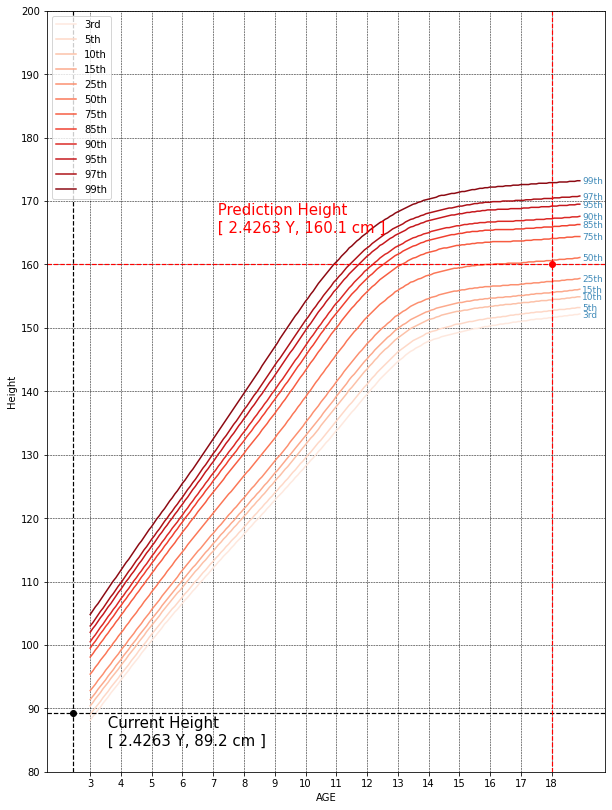

In [ ]:
height_graph(2, 2.426300, 89.2, col_range = 13)